In [59]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [60]:
df = pd.read_csv('high_diamond_ranked_10min.csv')
df

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,...,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,...,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,4524384067,0,43,1,0,4,5,5,1,0,...,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,4436033771,0,75,4,0,6,6,6,0,0,...,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9874,4527873286,1,17,2,1,7,4,5,1,1,...,0,15246,6.8,16498,229,34,-2519,-2469,22.9,1524.6
9875,4527797466,1,54,0,0,6,4,8,1,1,...,0,15456,7.0,18367,206,56,-782,-888,20.6,1545.6
9876,4527713716,0,23,1,0,6,7,5,0,0,...,0,18319,7.4,19909,261,60,2416,1877,26.1,1831.9
9877,4527628313,0,14,4,1,2,3,3,1,1,...,0,15298,7.2,18314,247,40,839,1085,24.7,1529.8


In [61]:
bluewin = pd.DataFrame(columns=['KillDiff', 'FirstBlood', 'GoldDiff', 'Dragon', 'ExperienceDiff', 'MinionDiff'])

In [62]:
# target
bluewin['win'] = df['blueWins']

# features
bluewin['KillDiff'] = df['blueKills'] - df['redKills']
bluewin['FirstBlood'] = df['blueFirstBlood'] - df['redFirstBlood']
# bluewin['AssistDiff'] = df['blueAssists'] - df['redAssists']
bluewin['GoldDiff'] = df['blueGoldDiff'] / 100
bluewin['Dragon'] = df['blueDragons']
# bluewin['Herald'] = df['blueHeralds']
bluewin['ExperienceDiff'] = df['blueExperienceDiff'] / 100
# bluewin['TowersDestroyed'] = df['blueTowersDestroyed']
bluewin['MinionDiff'] = df['blueTotalMinionsKilled'] - df['redTotalMinionsKilled']

In [63]:
bluewin

,KillDiff,FirstBlood,GoldDiff,Dragon,ExperienceDiff,MinionDiff,win
0,3,1,6.43,0,-0.08,-2,0
1,0,-1,-29.08,0,-11.73,-66,0
2,-4,-1,-11.72,1,-10.33,-17,0
3,-1,-1,-13.21,0,-0.07,-34,0
4,0,-1,-10.04,0,2.30,-15,0
...,...,...,...,...,...,...,...
9874,3,1,25.19,1,24.69,-18,1
9875,2,-1,7.82,1,8.88,27,1
9876,-1,-1,-24.16,0,-18.77,-51,0
9877,-1,1,-8.39,1,-10.85,-23,0


In [64]:
des = bluewin.describe(percentiles=[.01, .05, .25, .75, .95, .99])
des.T

,count,mean,std,min,1%,5%,25%,50%,75%,95%,99%,max
KillDiff,9879.0,0.046260,4.195489,-17.00,-10.0000,-7.000,-3.000,0.00,3.00,7.000,10.0000,16.00
FirstBlood,9879.0,0.009616,1.000004,-1.00,-1.0000,-1.000,-1.000,1.00,1.00,1.000,1.0000,1.00
GoldDiff,9879.0,0.144141,24.533492,-108.30,-57.3610,-40.332,-15.855,0.14,15.96,40.740,58.7486,114.67
Dragon,9879.0,0.361980,0.480597,0.00,0.0000,0.000,0.000,0.00,1.00,1.000,1.0000,1.00
ExperienceDiff,9879.0,-0.336203,19.203704,-93.33,-45.8528,-32.061,-12.905,-0.28,12.12,31.093,46.4810,83.48
MinionDiff,9879.0,-0.649661,30.942675,-120.00,-73.0000,-52.000,-21.000,-1.00,20.00,50.000,73.0000,127.00
win,9879.0,0.499038,0.500024,0.00,0.0000,0.000,0.000,0.00,1.00,1.000,1.0000,1.00


In [65]:
bluewin = bluewin[bluewin['KillDiff']<10]
bluewin = bluewin[bluewin['KillDiff']>-10]
# bluewin = bluewin[bluewin['AssistDiff']<9]
# bluewin = bluewin[bluewin['AssistDiff']>-9]
bluewin = bluewin[bluewin['GoldDiff']<58.7486]
bluewin = bluewin[bluewin['GoldDiff']>-57.3610]
bluewin = bluewin[bluewin['ExperienceDiff']<46.4810]
bluewin = bluewin[bluewin['ExperienceDiff']>-45.8528]
bluewin = bluewin[bluewin['MinionDiff']<73]
bluewin = bluewin[bluewin['MinionDiff']>-73]
bluewin

,KillDiff,FirstBlood,GoldDiff,Dragon,ExperienceDiff,MinionDiff,win
0,3,1,6.43,0,-0.08,-2,0
1,0,-1,-29.08,0,-11.73,-66,0
2,-4,-1,-11.72,1,-10.33,-17,0
3,-1,-1,-13.21,0,-0.07,-34,0
4,0,-1,-10.04,0,2.30,-15,0
...,...,...,...,...,...,...,...
9874,3,1,25.19,1,24.69,-18,1
9875,2,-1,7.82,1,8.88,27,1
9876,-1,-1,-24.16,0,-18.77,-51,0
9877,-1,1,-8.39,1,-10.85,-23,0


In [66]:
from sklearn.model_selection import train_test_split

In [67]:
x_data = bluewin.loc[:, 'KillDiff':'MinionDiff'] # 문제데이터
y_data = bluewin.loc[:, 'win'] # 정답데이터

In [68]:
x_train, x_test, y_train, y_test = train_test_split(
    x_data, # 문제 데이터
    y_data, # 답 데이터
    test_size =0.2, # 비율
    shuffle = True, # 셔플링 여부
    random_state = 20 # 시드값
)

In [69]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [70]:
rf_clf = RandomForestClassifier(random_state=11)
lr_clf = LogisticRegression()
knn5 = KNeighborsClassifier(n_neighbors=5)
knn10 = KNeighborsClassifier(n_neighbors=11)
svc_linear= SVC(kernel='linear')
svc_rbf = SVC(kernel='rbf')

In [71]:
clf_list = [rf_clf, lr_clf, knn5, knn10, svc_linear, svc_rbf]

In [72]:
from sklearn.model_selection import cross_val_score

In [73]:
def callKFold_all(clf_list):
    for clf in clf_list:
        scores = cross_val_score(clf, x_train, y_train, cv=5)
        for iter_count, accuracy in enumerate(scores):
            print("교차 검증 {0} 정확도: {1:.4f}".format(iter_count, accuracy))

        print("{0} - 평균 정확도: {1:.4f}".format(clf, np.mean(scores)))

In [74]:
first_result = callKFold_all(clf_list)
first_result

# random forest: 0.7185
# logistic regression: 0.7369
# KNN(n=5): 0.6892
# KNN(n=10): 0.7121
# SVC(kernel = 'linear'): 0.7358
# SVC(kernel = 'rbf'): 0.7285

교차 검증 0 정확도: 0.6883
교차 검증 1 정확도: 0.6943
교차 검증 2 정확도: 0.6934
교차 검증 3 정확도: 0.7174
교차 검증 4 정확도: 0.6767
RandomForestClassifier(random_state=11) - 평균 정확도: 0.6940
교차 검증 0 정확도: 0.7029
교차 검증 1 정확도: 0.7163
교차 검증 2 정확도: 0.7108
교차 검증 3 정확도: 0.7401
교차 검증 4 정확도: 0.7248
LogisticRegression() - 평균 정확도: 0.7190
교차 검증 0 정확도: 0.6809
교차 검증 1 정확도: 0.6809
교차 검증 2 정확도: 0.6794
교차 검증 3 정확도: 0.7168
교차 검증 4 정확도: 0.6667
KNeighborsClassifier() - 평균 정확도: 0.6849
교차 검증 0 정확도: 0.6983
교차 검증 1 정확도: 0.6976
교차 검증 2 정확도: 0.6894
교차 검증 3 정확도: 0.7194
교차 검증 4 정확도: 0.6967
KNeighborsClassifier(n_neighbors=11) - 평균 정확도: 0.7003
교차 검증 0 정확도: 0.7023
교차 검증 1 정확도: 0.7109
교차 검증 2 정확도: 0.7074
교차 검증 3 정확도: 0.7395
교차 검증 4 정확도: 0.7241
SVC(kernel='linear') - 평균 정확도: 0.7168
교차 검증 0 정확도: 0.6969
교차 검증 1 정확도: 0.7123
교차 검증 2 정확도: 0.7054
교차 검증 3 정확도: 0.7321
교차 검증 4 정확도: 0.7214
SVC() - 평균 정확도: 0.7136


Logistic Regression과 Linear SVC의 차이가 별로 없다? => 선형적인 관계성이 크다!

In [53]:
from sklearn.model_selection import GridSearchCV

In [79]:
# model = [rf_clf, lr_clf, svm_svc, knn]
# pa = [{'max_depth':[2,3,5,10], 'min_samples_split':[2,3,5], 'min_samples_leaf':[1,5,8]},
#       {'penalty':['l2', 'l1'],'C':[0.01, 0.1, 1, 1, 5, 10]}, 
#       {'kernel': ['rbf'], 'gamma': [0.00001,0.0001, 0.001, 0.01, 0.1, 1], 'C': [0.01, 0.1, 1, 10, 100, 1000]}, 
#       {'n_neighbors' : list(range(1,20))}]

params = {'C':[0.001, 0.01, 0.1, 1, 3, 5]} # 규제 강도 설정
grid_dclf = GridSearchCV(lr_clf, param_grid=params, cv = 4, scoring='accuracy', verbose=1)
grid_dclf.fit(x_train, y_train)

Fitting 4 folds for each of 6 candidates, totalling 24 fits


GridSearchCV(cv=4, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 3, 5]}, scoring='accuracy',
             verbose=1)

In [83]:
params = {'C':[0.001, 0.01, 0.1, 1, 3]} # 규제 강도 설정
grid_dclf = GridSearchCV(svc_linear, param_grid=params, cv = 5, scoring='accuracy', verbose=1)
grid_dclf.fit(x_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


GridSearchCV(cv=5, estimator=SVC(kernel='linear'),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 3]}, scoring='accuracy',
             verbose=1)

In [84]:
best_dclf = grid_dclf.best_estimator_
best_dclf

SVC(C=0.01, kernel='linear')

In [85]:
pred = best_dclf.predict(x_test)
pred

array([1, 1, 0, ..., 1, 0, 1])

In [86]:
accuracy = accuracy_score(y_test, pred)
accuracy

0.7318376068376068

In [89]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.75      0.73      0.74       971
           1       0.72      0.73      0.72       901

    accuracy                           0.73      1872
   macro avg       0.73      0.73      0.73      1872
weighted avg       0.73      0.73      0.73      1872



In [90]:
import matplotlib.pyplot as plt
import seaborn as sns

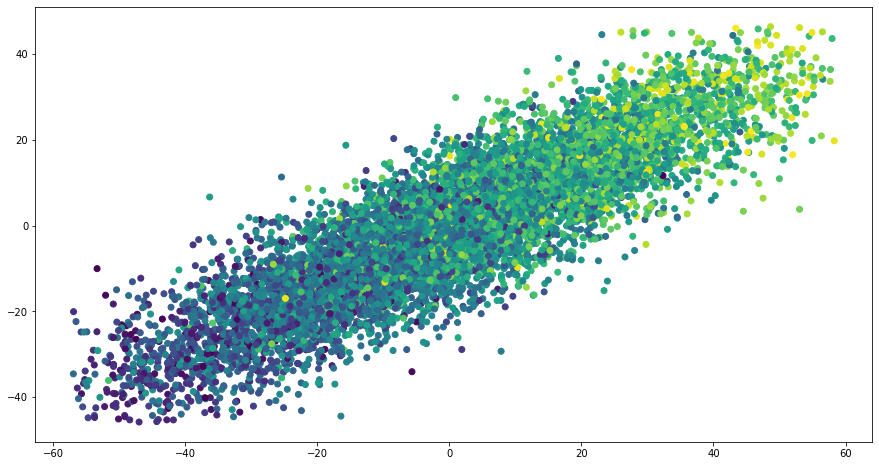

In [136]:
plt.figure(figsize=(15, 8))
plt.scatter(bluewin['GoldDiff'], bluewin['ExperienceDiff'], c=bluewin['MinionDiff'])
# plt.xlabel('Gold Difference')
# plt.ylabel('Experience Difference')
# plt.colorbar()
plt.show()

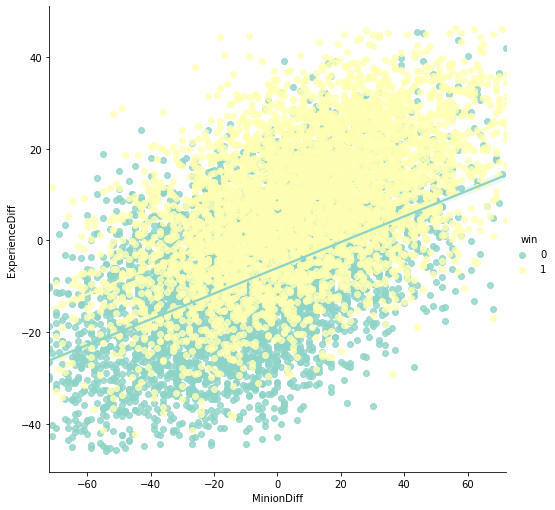

In [143]:
sns.lmplot(x='MinionDiff', y='ExperienceDiff', hue = 'win', 
           data=bluewin, palette='Set3', size=7)

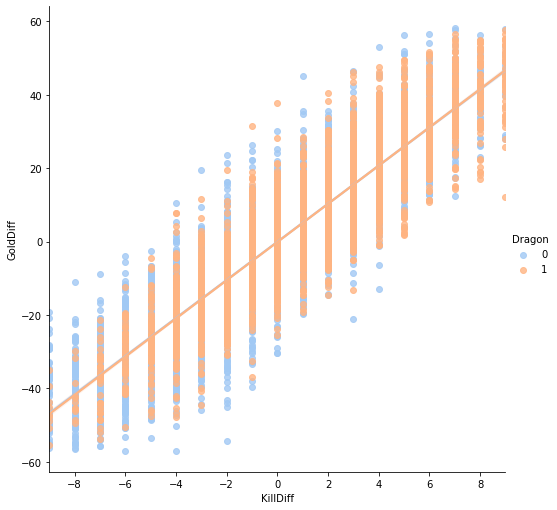

In [147]:
sns.lmplot(x='KillDiff', y='GoldDiff', hue = 'Dragon', 
           data=bluewin, palette='pastel', size=7)

In [ ]:
def svc_param_selection(x, y, nfolds):
    svm_parameters = [
                        {'kernel': ['linear'],
                         'gamma': [0.00001, 0.0001, 0.001, 0.01, 0.1, 1],
                         'C': [0.1, 1, 10]
                        }
                       ]
    
    clf = GridSearchCV(SVC(), svm_parameters, cv=10)
    clf.fit(x_train, y_train.values.ravel())
    print(clf.best_params_)
    
    return clf

In [ ]:
# 최적의 파라미터를 sklearn의 gridsearch를 통해 구합니다.
clf = svc_param_selection(x_train, y_train.values.ravel(), 10)